In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/enigma-train/train.csv
/kaggle/input/enigma-test/test.csv


In [16]:
train_data = pd.read_csv('/kaggle/input/enigma-train/train.csv')
train_data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH
0,12194,220000.0,FEMALE,graduate school,MARRIED,54,1,-2,-1,0.0,0.0,788.0,0.0,788.0,0.0,0
1,7068,90000.0,FEMALE,graduate school,SINGLE,30,2,2,3,750.0,750.0,750.0,0.0,0.0,0.0,0
2,1446,80000.0,FEMALE,university,SINGLE,25,2,3,2,69602.0,67930.0,72205.0,0.0,6000.0,2700.0,0
3,318,260000.0,FEMALE,high school,MARRIED,53,1,-1,-1,0.0,165.0,526.0,165.0,526.0,452.0,0
4,13732,30000.0,FEMALE,university,SINGLE,23,0,0,0,25287.0,26501.0,30300.0,2011.0,5000.0,868.0,0


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame called 'data' containing your features

# Define the columns you want to encode
columns_to_encode = ['MARITAL_STATUS']

# Extract the columns you want to encode
data_to_encode = train_data[columns_to_encode]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(data_to_encode)

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([train_data.drop(columns=columns_to_encode), encoded_df], axis=1)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
train_data=data_encoded

In [ ]:
# train_data['MARITAL_STATUS'].value_counts()

In [ ]:
# # Group by MARITAL_STATUS and count occurrences of each target value
# marital_status_counts = train_data.groupby(['MARITAL_STATUS', 'DEFAULT.PAYMENT.NEXT.MONTH']).size().unstack(fill_value=0)

# # Print the result
# print(marital_status_counts)

In [19]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH,MARITAL_STATUS_3,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE
0,12194,220000.0,FEMALE,graduate school,54,1,-2,-1,0.0,0.0,788.0,0.0,788.0,0.0,0,0.0,1.0,0.0
1,7068,90000.0,FEMALE,graduate school,30,2,2,3,750.0,750.0,750.0,0.0,0.0,0.0,0,0.0,0.0,1.0
2,1446,80000.0,FEMALE,university,25,2,3,2,69602.0,67930.0,72205.0,0.0,6000.0,2700.0,0,0.0,0.0,1.0
3,318,260000.0,FEMALE,high school,53,1,-1,-1,0.0,165.0,526.0,165.0,526.0,452.0,0,0.0,1.0,0.0
4,13732,30000.0,FEMALE,university,23,0,0,0,25287.0,26501.0,30300.0,2011.0,5000.0,868.0,0,0.0,0.0,1.0


In [20]:
# train_data['MARITAL_STATUS'] = train_data['MARITAL_STATUS'].replace({'3': 2, 'SINGLE': 0, 'MARRIED':1, '0':3})
# train_data['EDUCATION'] = train_data['EDUCATION'].replace({'high school': 2, 'graduate school': 1, 'university':0, 'Unknown':3})

In [21]:
train_data['SEX'].value_counts(normalize=True)

SEX
FEMALE    0.604714
MALE      0.395286
Name: proportion, dtype: float64

In [22]:
train_data['EDUCATION'].value_counts()

EDUCATION
university         9751
graduate school    7485
high school        3433
Unknown             331
Name: count, dtype: int64

In [23]:
# train_data['MARITAL_STATUS'].value_counts()

In [24]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

#Apply LabelEncoder to 'MARITAL_STATUS' and 'EDUCATION' columns
train_data['EDUCATION'] = label_encoder.fit_transform(train_data['EDUCATION'])
train_data['SEX'] = label_encoder.fit_transform(train_data['SEX'])

In [25]:
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame and 'target_column' is the label encoded 'SEX' column
# Separate features and target variable
X = train_data.drop(columns=['SEX'])
y = train_data['SEX']

# Apply SMOTE to balance the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a new DataFrame
df_resampled = pd.concat([pd.Series(y_resampled, name='SEX'), pd.DataFrame(X_resampled, columns=X.columns)], axis=1)

# Now 'df_resampled' contains the balanced dataset with 'SEX' column in its original position


In [26]:
train_data=df_resampled

In [27]:
# Assuming 'df_resampled' is your DataFrame where the 'SEX' column is in the 1st position
# Get the index of the 'SEX' column
sex_index = train_data.columns.get_loc('SEX')

# Insert the 'SEX' column at the 3rd position
df_resampled.insert(2, 'SEX', train_data.pop('SEX'))

# Now the 'SEX' column is in the 3rd position


In [28]:
train_data

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH,MARITAL_STATUS_3,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE
0,12194,220000.000000,0,1,54,1,-2,-1,0.000000,0.000000,788.000000,0.000000,788.000000,0.000000,0,0.0,1.000000,0.000000
1,7068,90000.000000,0,1,30,2,2,3,750.000000,750.000000,750.000000,0.000000,0.000000,0.000000,0,0.0,0.000000,1.000000
2,1446,80000.000000,0,3,25,2,3,2,69602.000000,67930.000000,72205.000000,0.000000,6000.000000,2700.000000,0,0.0,0.000000,1.000000
3,318,260000.000000,0,2,53,1,-1,-1,0.000000,165.000000,526.000000,165.000000,526.000000,452.000000,0,0.0,1.000000,0.000000
4,13732,30000.000000,0,3,23,0,0,0,25287.000000,26501.000000,30300.000000,2011.000000,5000.000000,868.000000,0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25393,13325,240000.000000,1,1,36,0,0,0,15922.483195,16548.967576,17103.428805,2486.311404,2179.622688,2127.783085,0,0.0,1.000000,0.000000
25394,13528,100000.000000,1,2,49,0,0,0,10774.456944,11868.355401,12820.735578,1275.054834,1199.780665,307.270509,0,0.0,1.000000,0.000000
25395,27136,230000.000000,1,1,34,-1,-1,-1,1722.697294,540.449618,395.605815,541.120968,396.109328,396.109328,0,0.0,0.167838,0.832162
25396,20478,160000.000000,1,1,27,-1,0,-1,8259.049141,10815.843987,13539.048927,8155.097129,13572.713580,8173.384885,0,0.0,0.000000,1.000000


In [29]:
train_data['SEX'].value_counts()

SEX
0    12699
1    12699
Name: count, dtype: int64

In [30]:
# from sklearn.preprocessing import LabelEncoder
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# #Apply LabelEncoder to 'MARITAL_STATUS' and 'EDUCATION' columns
# train_data['SEX'] = label_encoder.fit_transform(train_data['SEX'])

In [31]:
train_data['SEX'].value_counts(normalize=True)

SEX
0    0.5
1    0.5
Name: proportion, dtype: float64

In [32]:
train_data['EDUCATION'].value_counts()

EDUCATION
3    10722
1     9345
2     4935
0      396
Name: count, dtype: int64

In [33]:
# train_data['MARITAL_STATUS'].value_counts()

In [34]:
train_data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH,MARITAL_STATUS_3,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE
0,12194,220000.0,0,1,54,1,-2,-1,0.0,0.0,788.0,0.0,788.0,0.0,0,0.0,1.0,0.0
1,7068,90000.0,0,1,30,2,2,3,750.0,750.0,750.0,0.0,0.0,0.0,0,0.0,0.0,1.0
2,1446,80000.0,0,3,25,2,3,2,69602.0,67930.0,72205.0,0.0,6000.0,2700.0,0,0.0,0.0,1.0
3,318,260000.0,0,2,53,1,-1,-1,0.0,165.0,526.0,165.0,526.0,452.0,0,0.0,1.0,0.0
4,13732,30000.0,0,3,23,0,0,0,25287.0,26501.0,30300.0,2011.0,5000.0,868.0,0,0.0,0.0,1.0


In [35]:
train_data['DEFAULT.PAYMENT.NEXT.MONTH'].value_counts(normalize=True) * 100

DEFAULT.PAYMENT.NEXT.MONTH
0    80.262225
1    19.737775
Name: proportion, dtype: float64

In [36]:
train_data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25398 entries, 0 to 25397
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          25398 non-null  int64  
 1   LIMIT_BAL                   25398 non-null  float64
 2   SEX                         25398 non-null  int64  
 3   EDUCATION                   25398 non-null  int64  
 4   AGE                         25398 non-null  int64  
 5   INSTALLMENT_1               25398 non-null  int64  
 6   INSTALLMENT_2               25398 non-null  int64  
 7   INSTALLMENT_3               25398 non-null  int64  
 8   INSTALLMENT_AMT_1           25398 non-null  float64
 9   INSTALLMENT_AMT_2           25398 non-null  float64
 10  INSTALLMENT_AMT_3           25398 non-null  float64
 11  INSTALLMENT_PAID_1          25398 non-null  float64
 12  INSTALLMENT_PAID_2          25398 non-null  float64
 13  INSTALLMENT_PAID_3          253

In [37]:
correlation=train_data.corr()

In [38]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

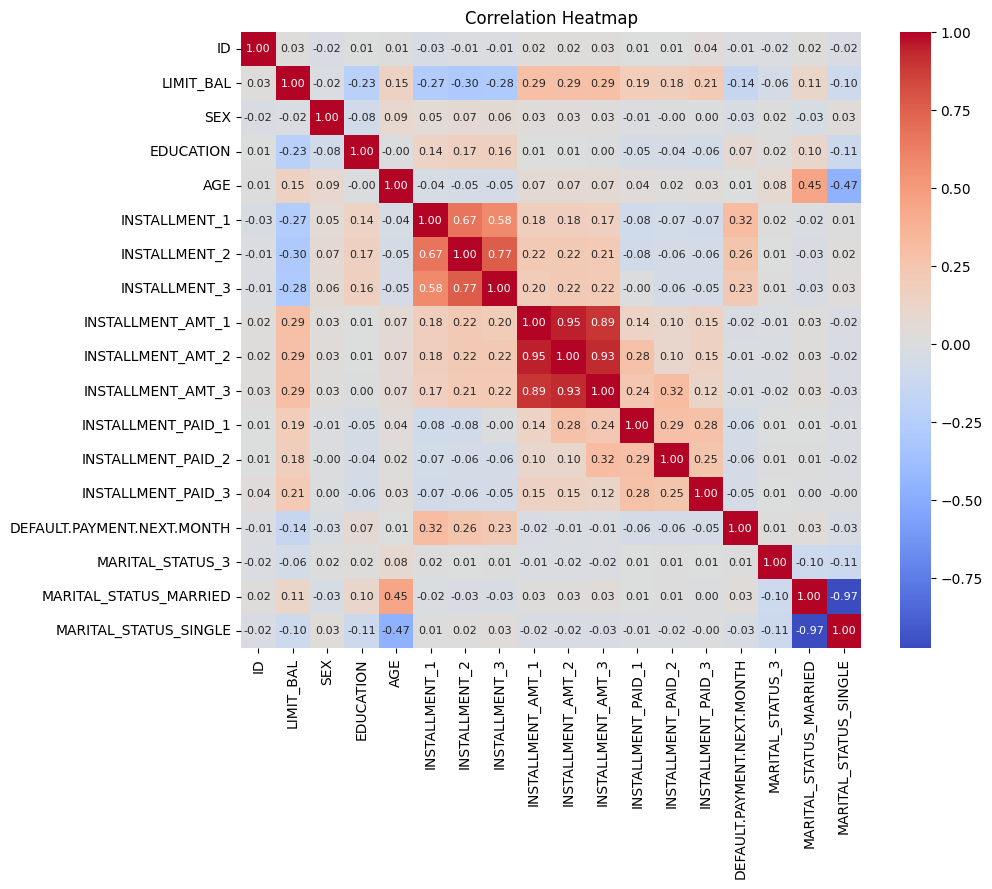

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# scaler = StandardScaler()


# X = train_data.drop(columns=['DEFAULT.PAYMENT.NEXT.MONTH'])  # Features
# y = train_data['DEFAULT.PAYMENT.NEXT.MONTH']  # Target variable

# # Fit scaler on your entire dataset
# X_standard = scaler.fit_transform(X)


In [41]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler
# scaler = MinMaxScaler()
# X = train_data.drop(columns=['DEFAULT.PAYMENT.NEXT.MONTH'])  # Features
# y = train_data['DEFAULT.PAYMENT.NEXT.MONTH']  # Target variable

# # Fit scaler on your entire dataset
# X_standard = scaler.fit_transform(X)

In [42]:
# X_standard

In [43]:
# train_data.drop(['SEX','MARITAL_STATUS','AGE','INSTALLMENT_AMT_1'],axis=1,inplace=True)

In [44]:
X = train_data.drop(columns=['DEFAULT.PAYMENT.NEXT.MONTH'])  # Features
y = train_data['DEFAULT.PAYMENT.NEXT.MONTH']  # Target variable

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to your data
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [46]:
# from imblearn.over_sampling import SMOTE

# # Instantiate SMOTE object
# smote = SMOTE(random_state=42)

# # Apply SMOTE to your data
# X_resampled, y_resampled = smote.fit_resample(X_standard, y)


In [47]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# # Initialize Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Initialize lists to store F1 scores for each fold
# f1_scores = []

# # Perform k-fold cross-validation
# for train_index, test_index in kfold.split(X_resampled, y_resampled):
#     X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
#     y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
#     # Fit Random Forest Classifier on the training data
#     rf_classifier.fit(X_train, y_train)
    
#     # Make predictions on the test data
#     y_pred = rf_classifier.predict(X_test)
    
#     # Calculate F1 score and append to list
#     f1_scores.append(f1_score(y_test, y_pred))

# # Calculate the mean F1 score across all folds
# mean_f1_score = sum(f1_scores) / len(f1_scores)

# print("Mean F1 Score:", mean_f1_score)

In [48]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score
# from sklearn.ensemble import RandomForestClassifier

# # Initialize Random Forest Classifier with regularization parameters
# rf_classifier = RandomForestClassifier(random_state=42)

# # Initialize Stratified K-Fold Cross-Validation with 10 folds
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize lists to store train and test F1 scores for each fold
# train_f1_scores = []
# test_f1_scores = []

# # Perform k-fold cross-validation
# for train_index, test_index in kfold.split(X_resampled, y_resampled):
#     X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
#     y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
#     # Fit Random Forest Classifier on the training data
#     rf_classifier.fit(X_train, y_train)
    
#     # Make predictions on the training and test data
#     y_train_pred = rf_classifier.predict(X_train)
#     y_test_pred = rf_classifier.predict(X_test)
    
#     # Calculate F1 score on the training and test data
#     train_f1_score = f1_score(y_train, y_train_pred)
#     test_f1_score = f1_score(y_test, y_test_pred)
    
#     # Append F1 scores to lists
#     train_f1_scores.append(train_f1_score)
#     test_f1_scores.append(test_f1_score)

# # Calculate mean train and test F1 scores across all folds
# mean_train_f1_score = sum(train_f1_scores) / len(train_f1_scores)
# mean_test_f1_score = sum(test_f1_scores) / len(test_f1_scores)

# print("Mean Train F1 Score:", mean_train_f1_score)
# print("Mean Test F1 Score:", mean_test_f1_score)


In [49]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import f1_score
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Initialize Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Define parameter grid for grid search
# param_grid = {
#     'max_depth': [15],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1]
# }

# # Initialize Stratified K-Fold Cross-Validation with 10 folds
# kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# # Initialize lists to store train and test F1 scores for each fold
# train_f1_scores = []
# test_f1_scores = []

# # Initialize grid search
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='f1', cv=kfold)

# # Perform grid search
# grid_search.fit(X_resampled, y_resampled)

# # Perform grid search and calculate F1 scores for each fold
# for train_index, test_index in kfold.split(X_resampled, y_resampled):
#     X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
#     y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
#     # Initialize RandomForestClassifier with current fold's parameters
#     rf_classifier.set_params(**grid_search.best_params_)
    
#     # Fit the RandomForestClassifier on the training data
#     rf_classifier.fit(X_train, y_train)
    
#     # Make predictions on the training and test data
#     y_train_pred = rf_classifier.predict(X_train)
#     y_test_pred = rf_classifier.predict(X_test)
    
#     # Calculate F1 score on the training and test data
#     train_f1_score = f1_score(y_train, y_train_pred)
#     test_f1_score = f1_score(y_test, y_test_pred)
    
#     # Append F1 scores to lists
#     train_f1_scores.append(train_f1_score)
#     test_f1_scores.append(test_f1_score)

# # Calculate mean train and test F1 scores across all folds
# mean_train_f1_score = np.mean(train_f1_scores)
# mean_test_f1_score = np.mean(test_f1_scores)

# # Get the best parameters and best F1 score from grid search
# best_params = grid_search.best_params_
# best_f1_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best F1 Score:", best_f1_score)
# print("Mean Train F1 Score:", mean_train_f1_score)
# print("Mean Test F1 Score:", mean_test_f1_score)


In [50]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import f1_score
# from xgboost import XGBClassifier
# import numpy as np

# # Initialize XGBoost Classifier
# xgb_classifier = XGBClassifier(random_state=42)

# # Define parameter grid for grid search
# param_grid = {
#     'max_depth': [15,20],
#     'min_child_weight': [1],
#     'subsample': [0.8],
#     'learning_rate': [0.1],
#     'n_estimators': [50]
# }

# # Initialize Stratified K-Fold Cross-Validation with 7 folds
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Initialize lists to store train and test F1 scores for each fold
# train_f1_scores = []
# test_f1_scores = []

# # Initialize grid search
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='f1', cv=kfold)

# # Perform grid search
# grid_search.fit(X_resampled, y_resampled)

# # Perform grid search and calculate F1 scores for each fold
# for train_index, test_index in kfold.split(X_resampled, y_resampled):
#     X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
#     y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
    
#     # Initialize XGBClassifier with current fold's parameters
#     xgb_classifier.set_params(**grid_search.best_params_)
    
#     # Fit the XGBClassifier on the training data
#     xgb_classifier.fit(X_train, y_train)
    
#     # Make predictions on the training and test data
#     y_train_pred = xgb_classifier.predict(X_train)
#     y_test_pred = xgb_classifier.predict(X_test)
    
#     # Calculate F1 score on the training and test data
#     train_f1_score = f1_score(y_train, y_train_pred)
#     test_f1_score = f1_score(y_test, y_test_pred)
    
#     # Append F1 scores to lists
#     train_f1_scores.append(train_f1_score)
#     test_f1_scores.append(test_f1_score)

# # Calculate mean train and test F1 scores across all folds
# mean_train_f1_score = np.mean(train_f1_scores)
# mean_test_f1_score = np.mean(test_f1_scores)

# # Get the best parameters and best F1 score from grid search
# best_params = grid_search.best_params_
# best_f1_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best F1 Score:", best_f1_score)
# print("Mean Train F1 Score:", mean_train_f1_score)
# print("Mean Test F1 Score:", mean_test_f1_score)


In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split data into training and validation sets (80:20)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
ada_classifier = AdaBoostClassifier()

# Define parameter grids for grid search
param_grid_rf = {
    'max_depth': [15],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

param_grid_xgb = {
    'max_depth': [20],
    'min_child_weight': [1],
    'subsample': [0.8],
    'learning_rate': [0.1],
    'n_estimators': [50]
}

param_grid_ada = {
    'n_estimators': [50],
    'learning_rate': [0.3]
}

# Create 10-fold cross-validation splitter
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store train and test F1 scores and accuracies
train_f1_scores = []
test_f1_scores = []
train_accuracies = []
test_accuracies = []

# Perform grid search and calculate scores for each classifier
classifiers = [(rf_classifier, param_grid_rf), (xgb_classifier, param_grid_xgb),
               (ada_classifier, param_grid_ada)]

for classifier, param_grid in classifiers:
    grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Perform cross-validation predictions on training set
    train_y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=kfold)
    train_accuracy = accuracy_score(y_train, train_y_pred)
    train_f1 = f1_score(y_train, train_y_pred)
    train_f1_scores.append(train_f1)
    train_accuracies.append(train_accuracy)

    # Perform cross-validation predictions on validation set
    test_y_pred = cross_val_predict(grid_search.best_estimator_, X_val, y_val, cv=kfold)
    test_accuracy = accuracy_score(y_val, test_y_pred)
    test_f1 = f1_score(y_val, test_y_pred)
    test_f1_scores.append(test_f1)
    test_accuracies.append(test_accuracy)

    print("Classifier:", type(classifier).__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best F1 Score:", grid_search.best_score_)
    print("Training Accuracy:", train_accuracy)
    print("Training F1 Score:", train_f1)
    print("Testing Accuracy:", test_accuracy)
    print("Testing F1 Score:", test_f1)
    print()

# Initialize the ensemble model (stacking ensemble using KNN as meta-classifier)
meta_classifier = KNeighborsClassifier()
stacking_pipeline = make_pipeline(StandardScaler(), meta_classifier)

# Fit stacking ensemble on predictions from base classifiers using training data
predictions_train = np.array([cross_val_predict(clf.best_estimator_, X_train, y_train, cv=kfold, method='predict_proba')
                              for clf, _ in classifiers]).transpose()
stacking_pipeline.fit(predictions_train, y_train)

# Evaluate ensemble model on training data
stacking_predictions_train = stacking_pipeline.predict(predictions_train)
ensemble_accuracy_train = accuracy_score(y_train, stacking_predictions_train)
ensemble_f1_score_train = f1_score(y_train, stacking_predictions_train)

print("Ensemble Model - Training Accuracy:", ensemble_accuracy_train)
print("Ensemble Model - Training F1 Score:", ensemble_f1_score_train)

# Get predictions from base classifiers for testing data
predictions_test = np.array([cross_val_predict(clf.best_estimator_, X_test, y_test, cv=kfold, method='predict_proba')
                             for clf, _ in classifiers]).transpose()

# Evaluate ensemble model on testing data
stacking_predictions_test = stacking_pipeline.predict(predictions_test)
ensemble_accuracy_test = accuracy_score(y_test, stacking_predictions_test)
ensemble_f1_score_test = f1_score(y_test, stacking_predictions_test)

print("Ensemble Model - Testing Accuracy:", ensemble_accuracy_test)
print("Ensemble Model - Testing F1 Score:", ensemble_f1_score_test)

# Calculate demographic parity ratio
male_predictions = stacking_pipeline.predict(predictions[X_val['SEX'] == 0])
female_predictions = stacking_pipeline.predict(predictions[X_val['SEX'] == 1])

demographic_parity_ratio = len(male_predictions) / len(female_predictions)
print("Demographic Parity Ratio:", demographic_parity_ratio)


In [52]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Split data into training and validation sets (80:20)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Define parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50],
    'learning_rate': [0.3]
}

# Create 10-fold cross-validation splitter
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store train and test F1 scores and accuracies
train_f1_scores = []
test_f1_scores = []
train_accuracies = []
test_accuracies = []

# Perform grid search and calculate scores for AdaBoost classifier
grid_search = GridSearchCV(ada_classifier, param_grid_ada, cv=kfold, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Perform cross-validation predictions on training set
train_y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=kfold)
train_accuracy = accuracy_score(y_train, train_y_pred)
train_f1 = f1_score(y_train, train_y_pred)
train_f1_scores.append(train_f1)
train_accuracies.append(train_accuracy)

# Perform cross-validation predictions on validation set
val_y_pred = cross_val_predict(grid_search.best_estimator_, X_val, y_val, cv=kfold)
val_accuracy = accuracy_score(y_val, val_y_pred)
val_f1 = f1_score(y_val, val_y_pred)
test_f1_scores.append(val_f1)
test_accuracies.append(val_accuracy)

print("AdaBoost Classifier:")
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Training Accuracy:", train_accuracy)
print("Training F1 Score:", train_f1)
print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1)
print()

# Calculate demographic parity ratio
male_predictions = val_y_pred[X_val['SEX'] == 0]
female_predictions = val_y_pred[X_val['SEX'] == 1]

demographic_parity_ratio = len(male_predictions) / len(female_predictions)
print("Demographic Parity Ratio:", demographic_parity_ratio)


AdaBoost Classifier:
Best Parameters: {'learning_rate': 0.3, 'n_estimators': 50}
Best F1 Score: 0.669069466734332
Training Accuracy: 0.7102649006622517
Training F1 Score: 0.6691639826354853
Validation Accuracy: 0.7100809418690214
Validation F1 Score: 0.6767842493847416

Demographic Parity Ratio: 1.0430969681784015


In [54]:


demographic_parity_ratio = len(female_predictions) / len(male_predictions)


In [56]:
# Harmonic mean function
def harmonic_mean(x, y):
    return 2 * (x * y) / (x + y)

# Calculate harmonic mean of best F1 score and Demographic Parity Ratio
final_score = harmonic_mean(grid_search.best_score_, demographic_parity_ratio)

print("Demographic Parity Ratio:", demographic_parity_ratio)
print("Final Score (Harmonic Mean):",final_score)

Demographic Parity Ratio: 0.9586836416046121
Final Score (Harmonic Mean): 0.7881120909176139


In [57]:
test_data = pd.read_csv('/kaggle/input/enigma-test/test.csv')

In [58]:
test_data['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
SINGLE     4847
MARRIED    4035
3           102
0            16
Name: count, dtype: int64

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame called 'data' containing your features

# Define the columns you want to encode
columns_to_encode = ['MARITAL_STATUS']

# Extract the columns you want to encode
data_to_encode = test_data[columns_to_encode]

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(data_to_encode)

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([test_data.drop(columns=columns_to_encode), encoded_df], axis=1)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
test_data=data_encoded

In [61]:
# test_data['SEX'] = test_data['SEX'].replace({'MALE':0, 'FEMALE':1})

In [62]:
# test_data['MARITAL_STATUS'].value_counts()

In [63]:
train_data

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH,MARITAL_STATUS_3,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE
0,12194,220000.000000,0,1,54,1,-2,-1,0.000000,0.000000,788.000000,0.000000,788.000000,0.000000,0,0.0,1.000000,0.000000
1,7068,90000.000000,0,1,30,2,2,3,750.000000,750.000000,750.000000,0.000000,0.000000,0.000000,0,0.0,0.000000,1.000000
2,1446,80000.000000,0,3,25,2,3,2,69602.000000,67930.000000,72205.000000,0.000000,6000.000000,2700.000000,0,0.0,0.000000,1.000000
3,318,260000.000000,0,2,53,1,-1,-1,0.000000,165.000000,526.000000,165.000000,526.000000,452.000000,0,0.0,1.000000,0.000000
4,13732,30000.000000,0,3,23,0,0,0,25287.000000,26501.000000,30300.000000,2011.000000,5000.000000,868.000000,0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25393,13325,240000.000000,1,1,36,0,0,0,15922.483195,16548.967576,17103.428805,2486.311404,2179.622688,2127.783085,0,0.0,1.000000,0.000000
25394,13528,100000.000000,1,2,49,0,0,0,10774.456944,11868.355401,12820.735578,1275.054834,1199.780665,307.270509,0,0.0,1.000000,0.000000
25395,27136,230000.000000,1,1,34,-1,-1,-1,1722.697294,540.449618,395.605815,541.120968,396.109328,396.109328,0,0.0,0.167838,0.832162
25396,20478,160000.000000,1,1,27,-1,0,-1,8259.049141,10815.843987,13539.048927,8155.097129,13572.713580,8173.384885,0,0.0,0.000000,1.000000


In [64]:
test_data

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,MARITAL_STATUS_3,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE
0,16691,150000.0,MALE,university,36,2,2,0,88655.0,86333.0,88931.0,0.0,4000.0,5000.0,0.0,1.0,0.0
1,15039,50000.0,MALE,university,33,0,0,0,8406.0,8418.0,8347.0,3000.0,3000.0,7508.0,0.0,0.0,1.0
2,7736,30000.0,FEMALE,graduate school,28,0,0,0,36541.0,17625.0,26243.0,5000.0,11000.0,3000.0,0.0,0.0,1.0
3,20871,200000.0,MALE,graduate school,31,1,2,2,182307.0,186128.0,197509.0,8300.0,15900.0,200.0,0.0,0.0,1.0
4,1651,500000.0,FEMALE,graduate school,45,-1,-1,-1,36954.0,-24704.0,22999.0,0.0,83000.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,11671,20000.0,MALE,university,31,0,0,0,18490.0,25404.0,19789.0,1500.0,2393.0,1000.0,0.0,1.0,0.0
8996,29527,60000.0,MALE,high school,46,0,0,0,61548.0,63020.0,16982.0,2700.0,1500.0,2000.0,0.0,0.0,1.0
8997,9016,70000.0,MALE,high school,56,0,0,0,42039.0,46330.0,47480.0,5000.0,2238.0,3000.0,0.0,1.0,0.0
8998,28520,80000.0,FEMALE,university,24,0,0,0,19188.0,18774.0,12339.0,1374.0,1235.0,1101.0,0.0,0.0,1.0


In [65]:
test_data['EDUCATION'].value_counts()

EDUCATION
university         4279
graduate school    3100
high school        1484
Unknown             137
Name: count, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

#Apply LabelEncoder to 'MARITAL_STATUS' and 'EDUCATION' columns
test_data['EDUCATION'] = label_encoder.fit_transform(test_data['EDUCATION'])
test_data['SEX'] = label_encoder.fit_transform(test_data['SEX'])

In [67]:
test_data['EDUCATION'].value_counts()

EDUCATION
3    4279
1    3100
2    1484
0     137
Name: count, dtype: int64

In [68]:
# test_data['MARITAL_STATUS'].value_counts()

In [69]:
# test_data['MARITAL_STATUS'] = test_data['MARITAL_STATUS'].replace({'3': 2, 'SINGLE': 0, 'MARRIED':1, '0':3})
# test_data['EDUCATION'] = test_data['EDUCATION'].replace({'high school': 2, 'graduate school': 1, 'university':0, 'Unknown':3})

In [71]:
# Make predictions on the test data
y_pred = grid_search.predict(test_data)

In [72]:
# Create a DataFrame with predictions and corresponding IDs
result_df = pd.DataFrame({'ID': test_data['ID'], 'Predicted_Default': y_pred})

# Export predictions to a CSV file
result_df.to_csv('predictions10.csv',index=False)